> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No-show appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The dataset contains informations about patients in brazil that show and miss their appointment.
### Dataset Description 
01-patientsId: identification of the patient
02- AppointmentId: Identification of each appointment
03- Gender: Male or Female
04- ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
05- AppointmentDay:The day of the actuall appointment, when they have to visit the doctor.
06- Age: How old is the patient.
07- Neighbourhood: Where the appointment takes place.
08- Scholarship: True or false if the patient registered in a scholarship or not.
09- Hypertension: True or False if the patient suffers from hypertension disease.
10- Diabetes: True or False if the patient suffers from diabetes or not
11- Alcoholism: True or False if the patient is alcoholic.
12- handicapped: True or False of the patient is handicapped.
13- SMS_received: True of False of the patient received SMS.
14- No_show: True or False if the patient showed for the appointment.
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

In [5]:
df.duplicated().sum()

0

The data has no duplicate rows


In [6]:
df[df.isnull()].count()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing values in the whole data set.

In [7]:
df["PatientId"].unique()

array([  2.98724998e+13,   5.58997777e+14,   4.26296230e+12, ...,
         7.26331493e+13,   9.96997666e+14,   1.55766317e+13])

In [8]:
df["PatientId"].nunique()

62299

The number of patient ID is less than the number of samples, this means there is duplicate numbers in patient ID.

In [9]:
df[df["PatientId"].duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
27,1.215484e+13,5628345,F,2016-04-27T10:51:45Z,2016-04-29T00:00:00Z,4,CONQUISTA,0,0,0,0,0,0,No
154,1.925263e+10,5636933,F,2016-04-28T16:38:34Z,2016-04-29T00:00:00Z,30,ITARARÉ,0,0,0,0,0,0,No
288,2.246214e+13,5532908,M,2016-03-31T12:39:06Z,2016-04-29T00:00:00Z,43,CARATOÍRA,0,0,0,0,0,1,Yes
290,7.222383e+12,5566070,M,2016-04-11T09:50:18Z,2016-04-29T00:00:00Z,7,CARATOÍRA,0,0,0,0,0,1,No
316,1.756579e+13,5582867,F,2016-04-14T10:01:09Z,2016-04-29T00:00:00Z,1,JOANA D´ARC,0,0,0,0,0,0,No
344,8.218631e+11,5638396,F,2016-04-29T07:59:32Z,2016-04-29T00:00:00Z,23,SÃO CRISTÓVÃO,1,0,0,1,0,0,No
363,7.422796e+13,5575145,F,2016-04-12T17:12:17Z,2016-04-29T00:00:00Z,1,TABUAZEIRO,0,0,0,0,0,1,No
369,4.341600e+14,5639863,F,2016-04-29T09:43:15Z,2016-04-29T00:00:00Z,39,PRAIA DO CANTO,0,0,0,0,0,0,No
371,4.497415e+09,5600825,F,2016-04-19T11:16:27Z,2016-04-29T00:00:00Z,11,BELA VISTA,0,0,0,0,0,0,No
373,9.555374e+13,5614108,F,2016-04-25T10:06:33Z,2016-04-29T00:00:00Z,22,ANDORINHAS,0,0,0,0,0,1,No


The data may contain duplicate patient ID according to their presence in the appointment, so we need to check the duplicated patient ID and no-show column, but first let's check if their is a duplicate appointment ID.

In [10]:
df['AppointmentID'].duplicated().sum()

0

There is no duplicate in the appointment ID so we need to remove the duplicate patient ID according to the no-show column.

In [11]:
df.duplicated(['PatientId','No-show']).sum()

38710

In [12]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The Minimum value in Age column is -1, that's not possible to have an age with negative value there for this value should be removed

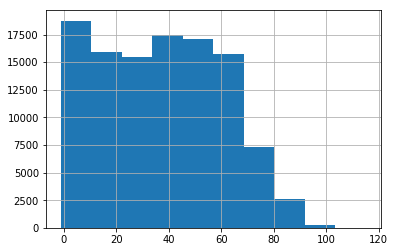

In [13]:
df['Age'].hist();

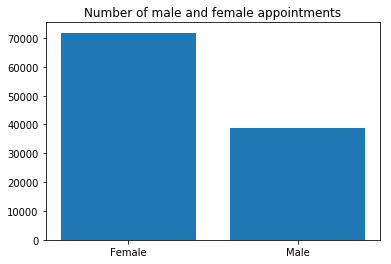

In [14]:
male=len(df.query('Gender == "M"'))
female=len(df.query('Gender=="F"'))
plt.bar(["Male","Female"],[male,female])
plt.title("Number of male and female appointments")
plt.show()

the data shows that the appointments from females is more than that from males, let's see the precentage of each.

In [15]:
male_perc=(male/len(df))*100
female_perc=(female/len(df))*100
male_perc , female_perc

(35.00230712857492, 64.99769287142509)

35% of the appointment is from males and 65% is from females


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

First let's drop the Age = -1

In [16]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section
age_1=df.query('Age =="-1"')
age_1

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
df.drop(age_1.index,inplace=True)


Now let's check if the value is dropped successfully or not

In [18]:
df.query('Age=="-1"')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


Now let's drop duplicate rows in patientId and no-show column

In [19]:

df.drop_duplicates(["PatientId","No-show"],inplace=True)

let's check if there is still any duplicates

In [20]:
df.duplicated(['PatientId','No-show']).any()

False

Some columns are written wrong such as: hipertension and handcap so let's rename them correctly

In [21]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicapped','No-show':'No_show'},inplace=True)
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicapped,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Now our data is ready for analysis but we need to remove the columns that won't be used in our analysis first.

In [22]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.

### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

Before answering the question let's have a look for the data

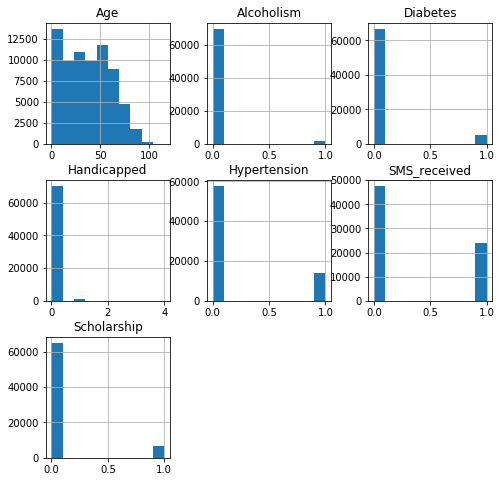

In [23]:
df.hist(figsize=(8,8));

The histogram shows that most of the patients are not in Alcoholism, diabetes, Handicapped, Hypertension groups.

Let's divide our data into two groups the showed and no_show patients.

In [24]:
no_show=df[df["No_show"]=="Yes"]
showed=df[df["No_show"]=="No"]


In [25]:
#let's see how many patient and their precentage didn't show for the appointment
len_no_show=len(no_show)
len_showed=len(showed)
Perc_no_show=(len_no_show/len(df))*100
len_no_show , Perc_no_show

(17663, 24.59479781664253)

25 % percent of the patients didn't show for thier appointment

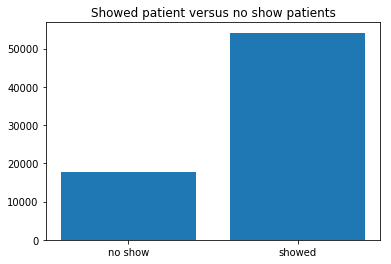

In [26]:
plt.bar(['showed','no show'],[len_showed,len_no_show])
plt.title('Showed patient versus no show patients')
plt.show()

In [27]:
showed.mean()

Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handicapped      0.020904
SMS_received     0.297232
dtype: float64

In [28]:
no_show.mean()

Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handicapped      0.017777
SMS_received     0.453094
dtype: float64

it seems that the showed patients and the patients that didn't show are at the same average age. the no show patients received sms more than the showed patients, this mean their is some thing wrong about the sms format.

let's build a function to use it for multiple visualizations.

In [29]:
show_check=df.No_show=='No'
no_show_check=df.No_show=='Yes'
def plotting(df,column_name):
    plt.figure(figsize=(8,8))
    df[column_name][show_check].hist(alpha=0.4,bins=10,color='blue',label='showed')
    df[column_name][no_show_check].hist(alpha=0.4,bins=10,color='red',label='no show')
    #plt.figure(figsize=(8,8))
    plt.legend();
    plt.title('{} effect on the attendance of the patients'.format(column_name))
    plt.xlabel('{}'.format(column_name))
    plt.ylabel('Patients number')


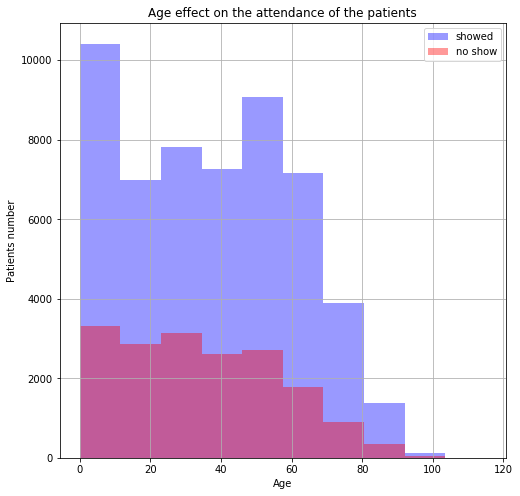

In [30]:
#check if the age affects the patient attendance.
attend(df,'Age')

Both data are right skewed. the data shows that the younger patients attend the appointment that refers to parents taking care of their kids, and older people from 50-60 are more likely to attend their appointment due to their medical condition.

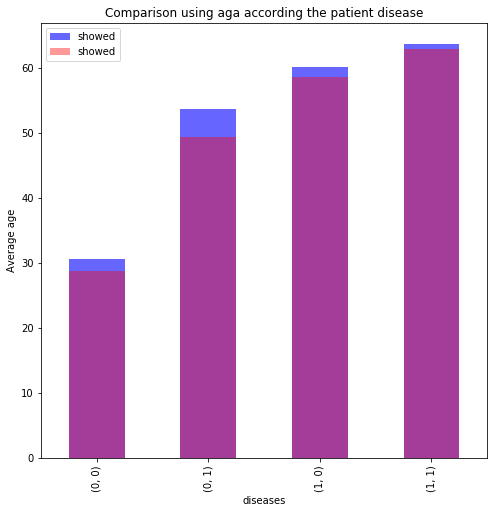

In [31]:
plt.figure(figsize=(8,8))
df[show_check].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='blue',alpha=0.6,label='showed')
df[no_show_check].groupby(['Hypertension','Diabetes']).mean()['Age'].plot(kind='bar',color='red',alpha=0.4,label='showed')
plt.legend();
plt.title('Comparison using aga according the patient disease')
plt.xlabel('diseases')
plt.ylabel('Average age')
plt.show()

In [32]:
df[show_check].groupby(['Hypertension','Diabetes']).mean()['Age'],df[no_show_check].groupby(['Hypertension','Diabetes']).mean()['Age']

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

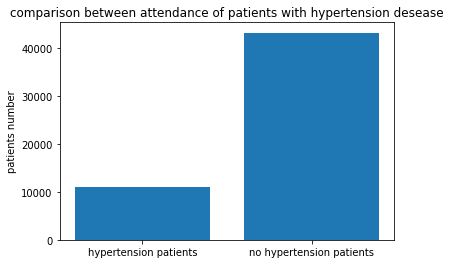

In [33]:
hyper_show=df.query('Hypertension == 1 & No_show=="No"')
no_hyper_show=df.query('Hypertension == 0 & No_show == "No"')
plt.bar(['hypertension patients','no hypertension patients'],[len(hyper_show),len(no_hyper_show)])
plt.title('comparison between attendance of patients with hypertension desease')
plt.ylabel('patients number')
plt.show();

this shows the age and diseases like hypertension and diabetes are correlated but both are not collerated with the attendence since the average age of both attended and no show patients are close, while the data shows there is a correlation between the attendance and the disease.

let's see if the patients neighborhood has an effect on the attendence or not.

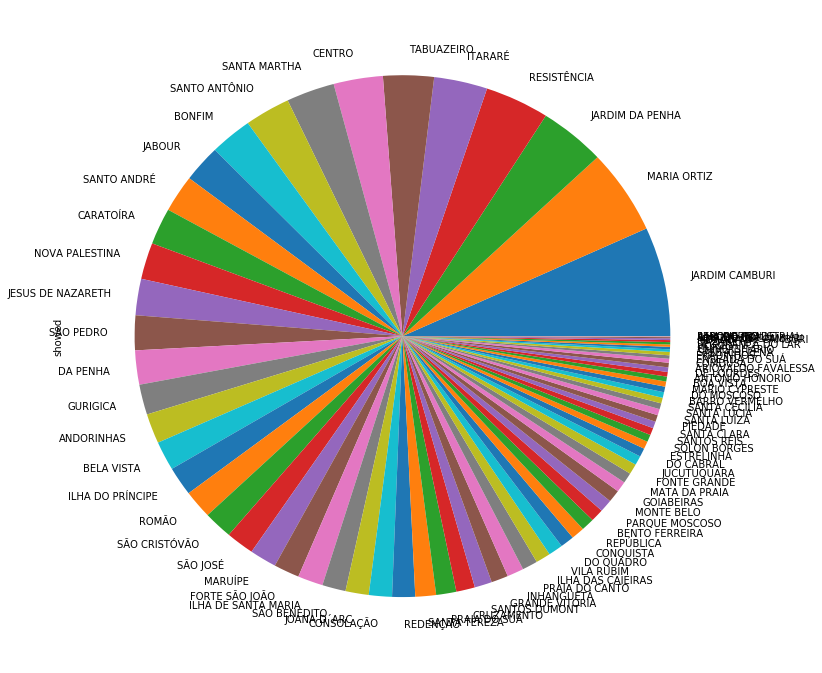

In [41]:
plt.figure(figsize=(12,12))
df.Neighbourhood[show_check].value_counts().plot(kind='pie',label='showed')


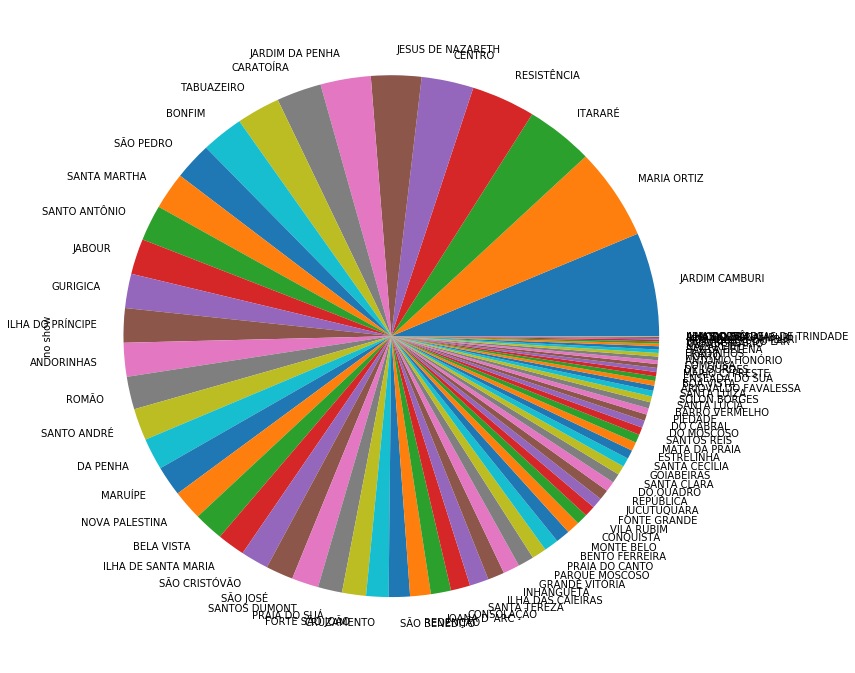

In [40]:
plt.figure(figsize=(12,12))
df.Neighbourhood[no_show_check].value_counts().plot(kind='pie',label='no show')


In [42]:
df['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

this shows that the neighbourhood effects the attendence; the patients fthat have appointment at 'jardim camburi' have number  of patients, let's have a closer look and see the number of attendend and no show patients.

In [48]:
jardim_showed=df.Neighbourhood[show_check].value_counts().max()
jardim_showed

3666

In [49]:
jardim_no_show=df.Neighbourhood[no_show_check].value_counts().max()
jardim_no_show

1134

In [53]:
perc_showed=((jardim_showed)/(jardim_showed+jardim_no_show))*100
perc_showed

76.375

76% of the patients in jardim camburi neighbourhood attended thier appointment.

Now let's make visualization for the received SMS and see the effect that we discussed before with graphes.

<a id='conclusions'></a>
## Conclusions
1- Female patients have higher rate of attendence than male because women takes way more care of they health in comparison to man.
2- Age has an effect on the attendence as younger patients attend more than the patients in 30-35 age and also older patients are more likely to show for the appointment.
3-the SMS showing negative impact on the attendence which may include a bad form and need to be improved.
4-diseases as ' Hypertension' also effects the attendence.
5-the neighbourhood also affects the attendence as noticed jardim camburi has the highest attendance rate.


### Limitations
1- More cases about the patients health need to be discussed 'hypertension and diabetes' are not enough maybe normal cases are more likely to miss their attendence.
2-the patients location must be added because may be the patients location has an effect on their attendence.
3-rating for the hospitals for each neighbourhood may be also useful; some neighbourhood may not afford the same treatment for some diseases as others.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])